In [27]:
# 1. Exploratory Data Analysis (EDA)

In [9]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd
df = pd.read_csv("Tesla_2020_2025.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,209.76,224.23,211.75,234.11,206.54,6244535
1,2020-01-02,243.04,119.56,166.12,192.77,277.07,7150097
2,2020-01-03,220.55,276.87,269.05,154.98,183.46,5166423
3,2020-01-06,208.98,253.83,191.09,249.49,182.52,2139450
4,2020-01-07,184.73,242.37,118.54,137.58,190.66,3052417
...,...,...,...,...,...,...,...
1301,2024-12-26,158.85,272.43,123.90,283.80,251.12,8316859
1302,2024-12-27,187.07,201.61,187.89,191.53,245.52,9246462
1303,2024-12-30,259.09,192.22,161.84,194.49,226.49,9739977
1304,2024-12-31,235.50,293.02,226.37,233.27,128.33,3462655


In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,209.76,224.23,211.75,234.11,206.54,6244535
1,2020-01-02,243.04,119.56,166.12,192.77,277.07,7150097
2,2020-01-03,220.55,276.87,269.05,154.98,183.46,5166423
3,2020-01-06,208.98,253.83,191.09,249.49,182.52,2139450
4,2020-01-07,184.73,242.37,118.54,137.58,190.66,3052417


In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2020-01-01 to 2025-01-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1306 non-null   float64
 1   High       1306 non-null   float64
 2   Low        1306 non-null   float64
 3   Close      1306 non-null   float64
 4   Adj Close  1306 non-null   float64
 5   Volume     1306 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 71.4 KB
None


In [19]:
# print summary statistics of the datase
print(df.describe())

             Open         High          Low        Close    Adj Close  \
count  1306.00000  1306.000000  1306.000000  1306.000000  1306.000000   
mean    199.75124   202.105681   198.662113   195.733086   199.946830   
std      58.81630    58.320192    57.322893    56.625803    57.383872   
min     100.11000   100.010000   100.010000   100.290000   100.100000   
25%     149.78250   152.940000   149.752500   146.620000   149.742500   
50%     197.26500   203.360000   195.315000   196.550000   200.745000   
75%     250.20750   253.745000   249.510000   244.197500   250.215000   
max     299.96000   299.710000   299.990000   299.990000   299.900000   

             Volume  
count  1.306000e+03  
mean   5.523703e+06  
std    2.583460e+06  
min    1.002885e+06  
25%    3.291950e+06  
50%    5.523600e+06  
75%    7.751935e+06  
max    9.996961e+06  


In [21]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [23]:
df.isnull()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,False,False,False,False,False,False
2020-01-02,False,False,False,False,False,False
2020-01-03,False,False,False,False,False,False
2020-01-06,False,False,False,False,False,False
2020-01-07,False,False,False,False,False,False
...,...,...,...,...,...,...
2024-12-26,False,False,False,False,False,False
2024-12-27,False,False,False,False,False,False
2024-12-30,False,False,False,False,False,False


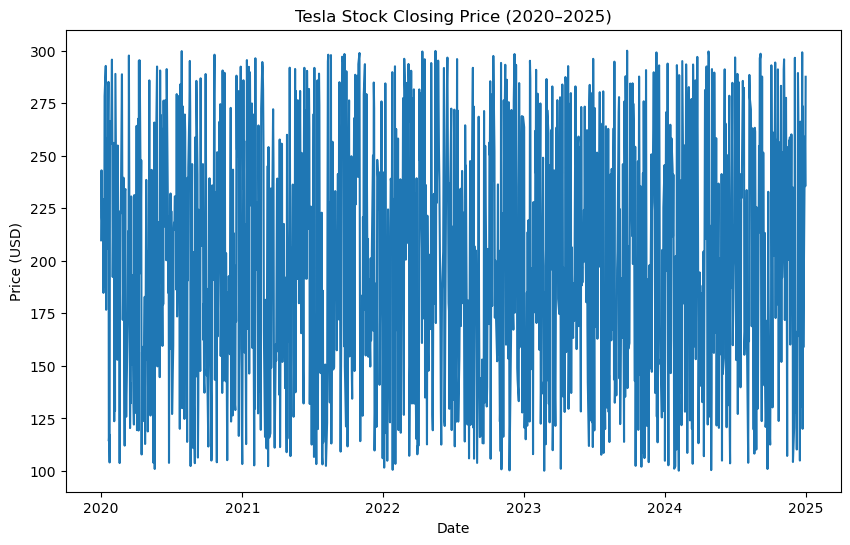

In [25]:
# why we use this code:-1. Understand the overall trend 2.Detect patterns or seasonality 
# 3.Spot outliers or anomalies 4.Prepare data for forecasting models


# plot the time series for currency to understand their trends, seasonality and any anomalies
plt.figure(figsize=(10, 6))
plt.plot(df['Open'])
plt.title('Tesla Stock Closing Price (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

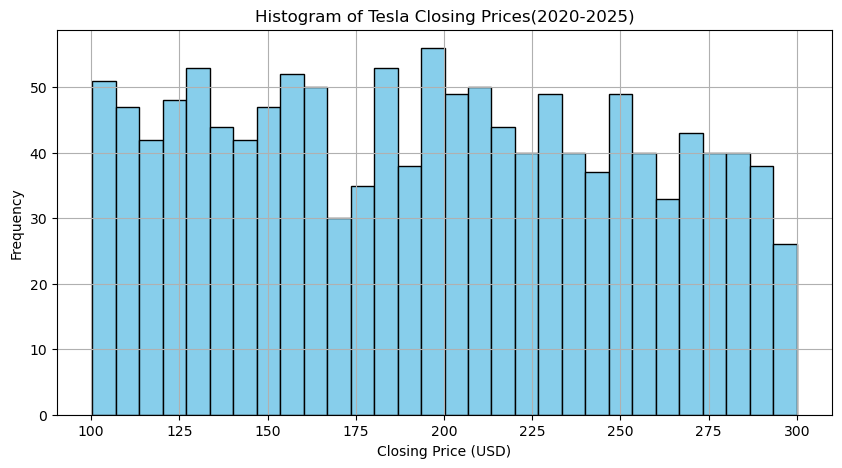

In [27]:
# Histogram of Closing Prices

plt.figure(figsize=(10, 5))
plt.hist(df['Close'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Tesla Closing Prices(2020-2025)")
plt.xlabel("Closing Price (USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


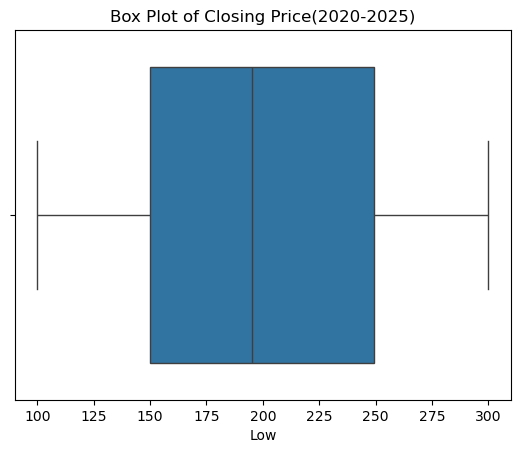

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Low'])
plt.title("Box Plot of Closing Price(2020-2025)")
plt.show()


In [31]:
Q1 = df['Low'].quantile(0.25)
Q3 = df['Low'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Low'] < Q1 - 1.5 * IQR) | (df['Low'] > Q3 + 1.5 * IQR)]
print(outliers)


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [33]:
# Data Preprocessing

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Use only 'Close' column for forecasting
data = df[['Close']].values # We're using only the Closing Price for prediction

# LSTM models work better when data is normalized 
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences (e.g., 60 days to predict next)
X = []
y = []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])    # previous 60 days as a input
    y.append(scaled_data[i])         # target: next day

X, y = np.array(X), np.array(y)

# Reshape X for LSTM [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
# 1. Model Building (LSTM) Long Short Term Memory.

In [96]:
#LSTM is commonly used for:
#a.Stock price prediction
#b.Weather forecasting 
#c.Language translation 
#d.Text generation 
#e.Sentiment analysis 

from keras.models import Sequential
from keras.layers import LSTM, Dense 

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X, y, epochs=10, batch_size=32)
lstm_model.save("lstm_model.h5")



Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.1107
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0840
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0854
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0781
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0832
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0831
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0771
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0791
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0792
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0805


In [68]:
# 2. Model Building(ARIMA) 
data = df['Close']  # this must be a Pandas Series


In [70]:
# ARIMA needs the data to be stationary (no clear trend or seasonality).
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("ADF Statistic:", result[0])
print("p-value:", result[1])  # If p-value < 0.05, data is stationary. If not, you'll need to difference the data.
# data_diff = data.diff().dropna()  # simple differencing


ADF Statistic: -36.85013089996846
p-value: 0.0


In [72]:
from statsmodels.tsa.arima.model import ARIMA # This is the main library to build and train ARIMA models in Python.
import matplotlib.pyplot as plt  # it is use for visualization

In [74]:
# Step 1: Split into train/test
train = data[:-30]
test = data[-30:]

In [76]:
# Step 2: Fit ARIMA model (you can tune p,d,q later)
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [78]:
# Step 3: Forecast
forecast = model_fit.forecast(steps=len(test))

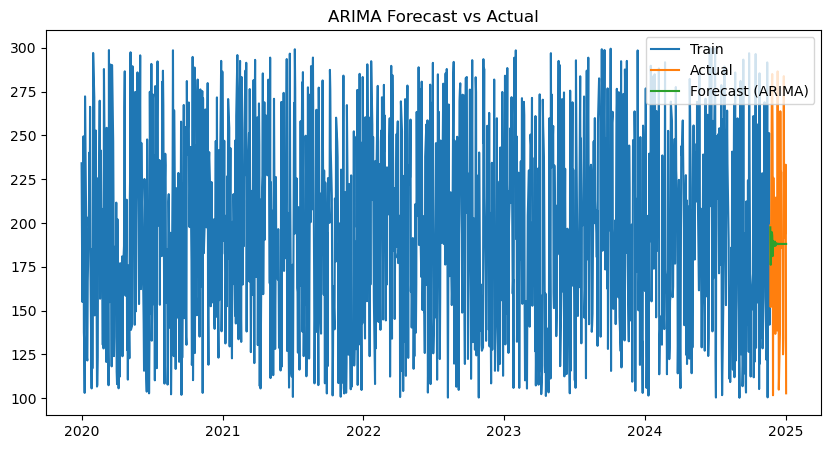

In [80]:
# Step 4: Plot
plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast (ARIMA)')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()


In [84]:
# LSTM Predictions
y_pred_lstm_raw = lstm_model.predict(X)  # shape: (n, 1)

# Inverse transform to original scale
predicted_lstm = scaler.inverse_transform(y_pred_lstm_raw).reshape(-1)
actual_lstm = scaler.inverse_transform(y.reshape(-1, 1)).reshape(-1)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


In [ ]:
# Compare Last 30 Days of LSTM with ARIMA

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Match length
actual_lstm_last = actual_lstm[-30:]
predicted_lstm_last = predicted_lstm[-30:]

# Metrics
rmse_lstm = np.sqrt(mean_squared_error(actual_lstm_last, predicted_lstm_last))
mae_lstm = mean_absolute_error(actual_lstm_last, predicted_lstm_last)

rmse_arima = np.sqrt(mean_squared_error(actual_arima, predicted_arima))
mae_arima = mean_absolute_error(actual_arima, predicted_arima)

# Print results
print(" LSTM  -> RMSE:", rmse_lstm, ", MAE:", mae_lstm)
print(" ARIMA -> RMSE:", rmse_arima, ", MAE:", mae_arima)
# RMSE (Root Mean Squared Error)-It gives more weight to larger errors. It’s useful when you care about big mistakes more
# MAE (Mean Absolute Error)-It tells you the average amount your predictions are off from the actual value, ignoring whether it's too high or low.

 LSTM  -> RMSE: 57.91113358572241 , MAE: 49.13239225260416
 ARIMA -> RMSE: 56.836665264898876 , MAE: 47.69680269791263


In [ ]:
# Plot for Visual Comparison

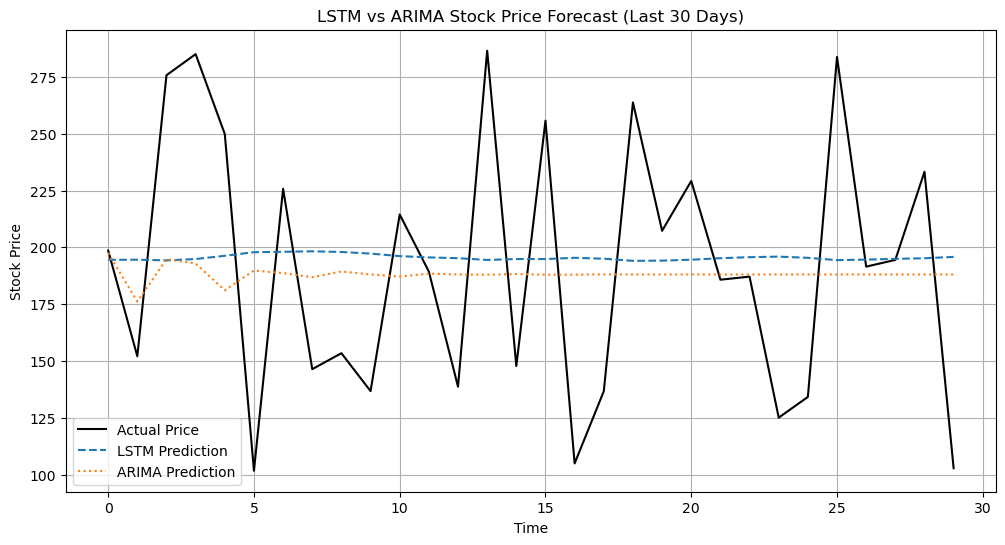

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(actual_lstm_last, label='Actual Price', color='black')
plt.plot(predicted_lstm_last, label='LSTM Prediction', linestyle='--')
plt.plot(predicted_arima, label='ARIMA Prediction', linestyle=':')
plt.title("LSTM vs ARIMA Stock Price Forecast (Last 30 Days)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# LSTM model is better then ARIMA model because it give good Accuracy, learn automatically and used in industry.  
# LSTM model is used in Weather, Stock market and Sentiment changes.
# ARIMA model is good for fast basseline or simple data. if u want quick result then u use this model.